In [ ]:
#linear combinaltion of orginal features with some weights 
you cannot use orginal variable .what happend to ur orginal data you cant explain in that case avoid PCa
very useful dimensionality reduction tecnique 

steps 
1.define Data
2.standardize data
3.find cov matrix
4.find eig value,eig vector
5.project ur data in new dimension (multiply with cov matrix using eig vecto )

In [37]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig

In [38]:
#defining very simple data
marks=np.array([[3,4],[2,8],[6,9]])
print(marks)

[[3 4]
 [2 8]
 [6 9]]


In [39]:
marks_df=pd.DataFrame(marks,columns=['maths','science'])
marks_df

,maths,science
0,3,4
1,2,8
2,6,9


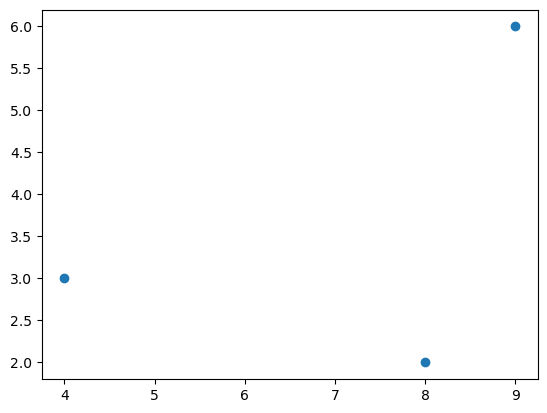

In [40]:
plt.scatter(marks_df['science'],marks_df['maths'])

In [41]:
#mean center 
meanbycolumn=np.mean(marks.T,axis=1)
print(meanbycolumn)

scaled_data=marks-meanbycolumn

[3.66666667 7.        ]


In [45]:
marks.T

array([[3, 2, 6],
       [4, 8, 9]])

In [44]:
scaled_data

array([[-0.66666667, -3.        ],
       [-1.66666667,  1.        ],
       [ 2.33333333,  2.        ]])

In [33]:
# from sklearn.preprocessing import StandardScaler
# std=StandardScaler()
# scaled=std.fit_transform(marks_df)

In [34]:
#scaled=pd.DataFrame(scaled,columns=['math','science'])

In [35]:
#scaled

,math,science
0,-0.392232,-1.38873
1,-0.980581,0.46291
2,1.372813,0.92582


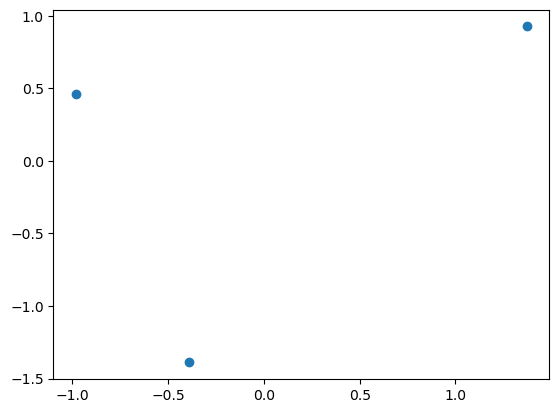

In [13]:
plt.scatter(scaled['math'],scaled['science'])

In [46]:
#find the covarainece matrix 
cov_mat=np.cov(scaled_data.T)
cov_mat # covarience matrix

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [48]:
#eigen value 
eig_val,eig_vec=eig(cov_mat)
print(f"Eigen Value is :{eig_val}")  #lambda 1,lambda 2
print(f"Eigen vector is : {eig_vec}") # vector 1,Vector 2

Eigen Value is :[2.83333333 8.5       ]
Eigen vector is : [[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


In [50]:
#projected Data 
Project=eig_vec.T.dot(scaled_data.T)
print(Project.T)

[[-9.71825316e-01  2.91547595e+00]
 [ 1.94365063e+00  1.11022302e-16]
 [-9.71825316e-01 -2.91547595e+00]]


In [57]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(scaled_data)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-1.91313040e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [58]:
pca.explained_variance_ratio_

array([0.75, 0.25])

In [59]:
df=pd.DataFrame(data=pca.fit_transform(scaled_data),columns=['PC1','PC2'])
df

,PC1,PC2
0,2.915476e+00,-0.971825
1,-1.913130e-16,1.943651
2,-2.915476e+00,-0.971825


In [60]:
load=pd.DataFrame(pca.components_.T,columns=['PC1','PC2'],index=['math','physics'])
load

,PC1,PC2
math,-0.514496,-0.857493
physics,-0.857493,0.514496


In [63]:
pca.inverse_transform(pca.fit_transform(marks))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])